[[ 2.97992606 10.04412452  9.72922312]
 [ 0.8262478   1.05745756  0.78224448]
 [ 5.1123524   5.2312854   5.01005362]]
Number of estimated clusters: 3


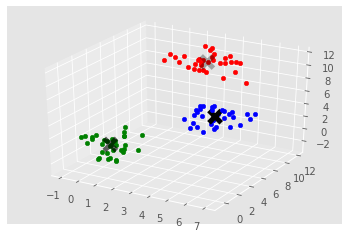

In [14]:
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
style.use("ggplot")

centers = [[1,1,1],[5,5,5],[3,10,10]]
X, _ = make_blobs(n_samples = 100, centers = centers, cluster_std = 1)

ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters_)

colors = 10*['r','g','b','c','k','y','m']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(X)):
    ax.scatter(X[i][0], X[i][1], X[i][2], c=colors[labels[i]], marker='o')
ax.scatter(cluster_centers[:,0], cluster_centers[:,1], cluster_centers[:,2], marker='x', color='k', s=150, linewidth=5, zorder=10)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
import numpy as np
from sklearn.cluster import MeanShift
from sklearn import preprocessing, cross_validation
import pandas as pd

df = pd.read_excel('titanic.xls')
original_df = pd.DataFrame.copy(df)
#print(df.head())
df.drop(['body', 'name'] , 1, inplace = True)
df.convert_objects(convert_numeric= True)
df.fillna(0,inplace=True)

def handle_non_numerical_data(df):
    coloumns = df.columns.values
    
    for column in columns:
        text_digit_vals = []
        def convert_to_int(val):
            return text_digit_vals[val]
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x= 0 
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1
            df[column] = list(map(convert_to_int,df[column]))
    return df
df = handle_non_numerical_data(df)

#df.drop(['boat'],1,inplace=True)

X = np.array(df.drop(['survived'],1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['survived'])

clf = MeanShift()
clf.fit(X)

labels = clf.labels_
cluster_centers = clf.cluster_centers_

original_df['cluster_group'] = np.nan

for i in range(len(X)):
    original_df['cluster_group'].iloc[i] = labels[i]

n_clusters = len(np.unique(labels))
    
survival_rates = {}
for i in range(n_clusters):
    temp_df = original_df[(original_df['cluster_group'] == float(i))]

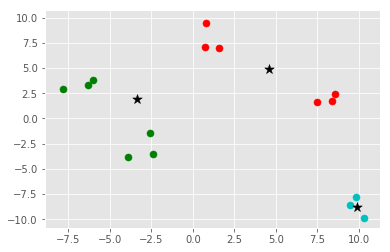

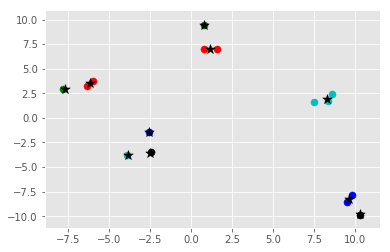

With 10 clusters


In [139]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
import numpy as np
import sklearn

from sklearn.datasets.samples_generator import make_blobs
import random

centers = random.randrange(2,8)
# X= np.array([[1,2],
#             [1.5,1.8],
#             [5,8],
#             [8,8],
#             [1,0.6],
#             [9,11],
#             [1,3],
#             [8,9],[10,2],[9,3]])

# X, y = make_blobs(n_samples=15, centers=5,n_features=2) 




# plt.scatter(X[:,0], X[:,1], s=150)
# plt.show()

colors = 10*["g","r","c","b","k"]

class Mean_Shift:
    def __init__(self, radius=None, radius_norm_step=100):
        self.radius = radius
        self.radius_norm_step = radius_norm_step
        
    def fit(self, data):
        
        if self.radius == None:
            all_data_centroid = np.average(data,axis=0)
            all_data_norm = np.linalg.norm(all_data_centroid)
            self.radius = all_data_norm / self.radius_norm_step
        centroids = {}
        
        for i in range(len(data)):
            centroids[i] = data[i]
        
        weights = [i for i in range(0,self.radius_norm_step)][::-1]
        
        optimized = False
        
        while not optimized:
            new_centroids = []
            for i in centroids:
                in_bandwidth = []
                centroid = centroids[i]
                
                
                for featureset in data:
                    distance = np.linalg.norm(featureset-centroid)
                    if distance ==0:
                        distance = 0.000000001
                    
                    weight_index = int(distance/self.radius)
                    if weight_index > len(weights) -1:
                        weight_index = len(weights)-1
                    to_add = (weights[weight_index]**2)*[featureset]
                    in_bandwidth += to_add
                        
                new_centroid = np.average(in_bandwidth, axis=0)
                new_centroids.append(tuple(new_centroid))
                
            uniques = sorted(list(set(new_centroids)))
            
            to_pop = []
            
            for i in uniques:
                for ii in uniques:
                    if i == ii:
                        pass
                    elif np.linalg.norm(np.array(i) - np.array(ii)) <= self.radius:
                        to_pop.append(ii)
                        try:
                            to_pop.remove(i)
                        except:
                            pass
                        break
            
            for i in to_pop:
                try:
                    uniques.remove(i)
                except:
                    pass
                
            
            
            prev_centroids = dict(centroids)
            
            centroids ={}
            
            for i in range(len(uniques)):
                centroids[i] = np.array(uniques[i])
                
            optimized = True
            
            for i in centroids:
                if not np.array_equal(centroids[i], prev_centroids[i]):
                    optimized = False
                    break
        self.centroids = centroids
        
        self.classifications = {}
        
        for i in range(len(self.centroids)):
            self.classifications[i] = []
        
        for featureset in data:
            distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
            classification = distances.index(min(distances))
            self.classifications[classification].append(featureset)
        
    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
    
#clf = Mean_Shift()
clf = sklearn.cluster.MeanShift()
clf.fit(X)

centroids = clf.cluster_centers_

for i in range(len(X)):
    plt.scatter(X[i][0], X[i][1], color = colors[clf.labels_[i]], s=50)

for c in centroids:
    plt.scatter(c[0], c[1], color='k', marker='*', s=100)
plt.show()

clf2 = Mean_Shift(radius_norm_step=1000)
clf2.fit(X)
for classification in clf2.classifications:
    color = colors[classification]
    for featureset in clf2.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], color = color, s=50)

centroids = clf2.centroids
for c in centroids:
    plt.scatter(centroids[c][0], centroids[c][1], color='k', marker='*', s=100)
plt.show()    
print("With %d clusters" %len(centroids))